In [5]:
import os
import pandas as pd
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
from matplotlib import style
import matplotlib.pyplot as plt
from sklearn import datasets
from jupyterthemes import jtplot
import json

from datetime import datetime

In [6]:
stock_name = "resources/stocks_list.csv"
stockname_df = pd.read_csv(stock_name)
stockname_df.head(10)

,Symbol,Name,Industry,Market Cap
0,A,Agilent Technologies,Life Sciences Tools & Services,4.154164e+10
1,AA,Alcoa,Metals & Mining,1.661080e+10
2,AAC,Ares Acquisition,Blank Check / SPAC,1.467000e+09
3,AACG,ATA Creativity Global,Diversified Consumer Services,4.298635e+07
4,AACI,Armada Acquisition I,Blank Check / SPAC,2.039886e+08
5,AADI,Aadi Bioscience,Biotechnology,3.725486e+08
6,AAIC,Arlington Asset Investment,Mortgage Real Estate Investment Trust...,1.075756e+08
7,AAL,American Airlines Group,Airlines,1.178875e+10
8,AAMC,Altisource Asset Management,Real Estate Management & Development,3.095673e+07
9,AAME,Atlantic American,Insurance,6.052444e+07


In [7]:
stockname_df.to_html("stockname.html",index = False, classes = ["table", "table-hover", "table-striped"])

In [8]:
# Extract the data set from csv file: 
stock = "resources/all_stocks_5yr.csv"
allstock_df = pd.read_csv(stock)
#rename column for merge
allstock_df=allstock_df.rename(columns={"Name":"Symbol"})
allstock_df.head(10)

,date,open,high,low,close,volume,Symbol
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
5,2013-02-15,13.93,14.61,13.93,14.50,15628000,AAL
6,2013-02-19,14.33,14.56,14.08,14.26,11354400,AAL
7,2013-02-20,14.17,14.26,13.15,13.33,14725200,AAL
8,2013-02-21,13.62,13.95,12.90,13.37,11922100,AAL
9,2013-02-22,13.57,13.60,13.21,13.57,6071400,AAL


In [9]:
#load helper csv to add name and industry to original dataset
stockname="resources/stocks_list.csv"
stockname_df=pd.read_csv(stockname)
stockname_df=stockname_df[['Symbol','Name','Industry','Market Cap']]
stockname_df.head()

,Symbol,Name,Industry,Market Cap
0,A,Agilent Technologies,Life Sciences Tools & Services,4.154164e+10
1,AA,Alcoa,Metals & Mining,1.661080e+10
2,AAC,Ares Acquisition,Blank Check / SPAC,1.467000e+09
3,AACG,ATA Creativity Global,Diversified Consumer Services,4.298635e+07
4,AACI,Armada Acquisition I,Blank Check / SPAC,2.039886e+08


In [10]:
#merge 2 datasets
merged_df=pd.merge(allstock_df ,stockname_df, how='left', on='Symbol')
merged_df.head()

,date,open,high,low,close,volume,Symbol,Name,Industry,Market Cap
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,American Airlines Group,Airlines,1.178875e+10
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,American Airlines Group,Airlines,1.178875e+10
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,American Airlines Group,Airlines,1.178875e+10
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,American Airlines Group,Airlines,1.178875e+10
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,American Airlines Group,Airlines,1.178875e+10


In [11]:
# narrow down into 1 year (2018) 

one_year_df = merged_df.loc[merged_df["date"] >= "2017-01-01"]
one_year_df

,date,open,high,low,close,volume,Symbol,Name,Industry,Market Cap
982,2017-01-03,47.28,47.340,46.135,46.30,6737752,AAL,American Airlines Group,Airlines,1.178875e+10
983,2017-01-04,46.63,47.435,46.350,46.70,5859604,AAL,American Airlines Group,Airlines,1.178875e+10
984,2017-01-05,46.52,46.930,45.610,45.89,6825316,AAL,American Airlines Group,Airlines,1.178875e+10
985,2017-01-06,45.85,46.720,45.470,46.21,7260197,AAL,American Airlines Group,Airlines,1.178875e+10
986,2017-01-09,46.01,47.340,45.780,47.08,4739142,AAL,American Airlines Group,Airlines,1.178875e+10
...,...,...,...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.270,76.690,77.82,2982259,ZTS,Zoetis,Pharmaceuticals,9.075058e+10
619036,2018-02-02,77.53,78.120,76.730,76.78,2595187,ZTS,Zoetis,Pharmaceuticals,9.075058e+10
619037,2018-02-05,76.64,76.920,73.180,73.83,2962031,ZTS,Zoetis,Pharmaceuticals,9.075058e+10
619038,2018-02-06,72.74,74.560,72.130,73.27,4924323,ZTS,Zoetis,Pharmaceuticals,9.075058e+10


In [12]:
one_year_df = one_year_df.reset_index(drop=True)
one_year_df

,date,open,high,low,close,volume,Symbol,Name,Industry,Market Cap
0,2017-01-03,47.28,47.340,46.135,46.30,6737752,AAL,American Airlines Group,Airlines,1.178875e+10
1,2017-01-04,46.63,47.435,46.350,46.70,5859604,AAL,American Airlines Group,Airlines,1.178875e+10
2,2017-01-05,46.52,46.930,45.610,45.89,6825316,AAL,American Airlines Group,Airlines,1.178875e+10
3,2017-01-06,45.85,46.720,45.470,46.21,7260197,AAL,American Airlines Group,Airlines,1.178875e+10
4,2017-01-09,46.01,47.340,45.780,47.08,4739142,AAL,American Airlines Group,Airlines,1.178875e+10
...,...,...,...,...,...,...,...,...,...,...
139157,2018-02-01,76.84,78.270,76.690,77.82,2982259,ZTS,Zoetis,Pharmaceuticals,9.075058e+10
139158,2018-02-02,77.53,78.120,76.730,76.78,2595187,ZTS,Zoetis,Pharmaceuticals,9.075058e+10
139159,2018-02-05,76.64,76.920,73.180,73.83,2962031,ZTS,Zoetis,Pharmaceuticals,9.075058e+10
139160,2018-02-06,72.74,74.560,72.130,73.27,4924323,ZTS,Zoetis,Pharmaceuticals,9.075058e+10


In [13]:
quantity = one_year_df["Name"].unique()
quantity

array(['American Airlines Group', 'Apple', 'Advance Auto Parts', 'AbbVie',
       'AmerisourceBergen', 'Abbott Laboratories', 'Accenture', 'Adobe',
       'Analog Devices', 'Archer-Daniels-Midland Company',
       'Automatic Data Processing', 'Autodesk', 'Alliance Data Systems',
       'Ameren', 'American Electric Power Company', 'The AES Corporation',
       nan, 'Aflac', 'American International Group',
       'Apartment Investment & Management Company', 'Assurant',
       'Arthur J. Gallagher & Company', 'Akamai Technologies',
       'Albemarle', 'Align Technology', 'Alaska Air Group', 'Allegion',
       'The Allstate Corporation', 'Applied Materials',
       'Advanced Micro Devices', 'AMETEK', 'Amgen',
       'Affiliated Managers Group', 'Ameriprise Financial',
       'American Tower', 'Amazon.com', 'ANSYS', 'Anthem', 'Aon plc',
       'A. O. Smith', 'APA Corporation', 'Air Products & Chemicals',
       'Amphenol', 'Aptiv', 'Alexandria Real Estate Equities', 'Arconic',
       'Activ

In [14]:
#View all Industry in the orignal dataset to select which industry to focus on
one_year_df["Industry"].unique()

array(['Airlines', 'Technology Hardware, Storage & Periph...',
       'Specialty Retail', 'Biotechnology',
       'Health Care Providers & Services',
       'Health Care Equipment & Supplies', 'IT Services', 'Software',
       'Semiconductors & Semiconductor Equipment', 'Food Products',
       'Multi-Utilities', 'Electric Utilities',
       'Independent Power and Renewable Elect...', nan, 'Insurance',
       'Equity Real Estate Investment Trusts ...', 'Chemicals',
       'Building Products', 'Electrical Equipment', 'Capital Markets',
       'Internet & Direct Marketing Retail',
       'Oil, Gas & Consumable Fuels',
       'Electronic Equipment, Instruments & C...', 'Auto Components',
       'Aerospace & Defense', 'Entertainment', 'Containers & Packaging',
       'Water Utilities', 'Consumer Finance',
       'Life Sciences Tools & Services', 'Banks', 'Beverages',
       'Pharmaceuticals', 'Diversified Financial Services', 'Machinery',
       'Hotels, Restaurants & Leisure', 'Health Care

In [15]:
#Dataframe with Pharmaceutical industries into json file
pharm_df=one_year_df.loc[one_year_df["Industry"] == "Pharmaceuticals"]
pharm_df["Name"].unique()

array(['Bristol-Myers Squibb Company', 'Johnson & Johnson',
       'Eli Lilly and Company', 'Merck & Co.', 'Pfizer',
       'Perrigo Company', 'Zoetis'], dtype=object)

In [16]:
#Dataframe with "Technology Hardware, Storage & Periph..." industries into json file
tech_df=one_year_df.loc[one_year_df["Industry"] == "Technology Hardware, Storage & Periph..."]
tech_df["Name"].unique()
#tech_df.to_json(r'jsonfiles/technology.json')

array(['Apple', 'Hewlett-Packard Enterprise Company', 'HP Inc.', 'NetApp',
       'Seagate Technology Holdings', 'Western Digital', 'Xerox Holdings'],
      dtype=object)

In [17]:
#Dataframe with Banks industries into json file
banks_df=one_year_df.loc[one_year_df["Industry"] == "Banks"]
#banks_df.to_json(r'jsonfiles/finance.json')
banks_df

,date,open,high,low,close,volume,Symbol,Name,Industry,Market Cap
16110,2017-01-03,22.60,22.680,22.200,22.53,99298080,BAC,Bank of America,Banks,3.503370e+11
16111,2017-01-04,22.72,22.960,22.600,22.95,76875052,BAC,Bank of America,Banks,3.503370e+11
16112,2017-01-05,22.82,22.930,22.345,22.68,86826447,BAC,Bank of America,Banks,3.503370e+11
16113,2017-01-06,22.78,22.850,22.560,22.68,66281476,BAC,Bank of America,Banks,3.503370e+11
16114,2017-01-09,22.51,22.710,22.400,22.55,75901509,BAC,Bank of America,Banks,3.503370e+11
...,...,...,...,...,...,...,...,...,...,...
138880,2018-02-01,53.79,55.000,53.590,54.98,3542047,ZION,Zions Bancorporation NA,Banks,1.059309e+10
138881,2018-02-02,54.77,55.610,53.980,54.15,4533570,ZION,Zions Bancorporation NA,Banks,1.059309e+10
138882,2018-02-05,53.54,54.160,51.220,51.65,3305284,ZION,Zions Bancorporation NA,Banks,1.059309e+10
138883,2018-02-06,50.41,52.760,49.761,52.52,3682542,ZION,Zions Bancorporation NA,Banks,1.059309e+10


In [18]:
# extract BAC:

BAC_df = banks_df.loc[banks_df["Name"]=="Bank of America"]
BAC_df

,date,open,high,low,close,volume,Symbol,Name,Industry,Market Cap
16110,2017-01-03,22.60,22.68,22.200,22.53,99298080,BAC,Bank of America,Banks,3.503370e+11
16111,2017-01-04,22.72,22.96,22.600,22.95,76875052,BAC,Bank of America,Banks,3.503370e+11
16112,2017-01-05,22.82,22.93,22.345,22.68,86826447,BAC,Bank of America,Banks,3.503370e+11
16113,2017-01-06,22.78,22.85,22.560,22.68,66281476,BAC,Bank of America,Banks,3.503370e+11
16114,2017-01-09,22.51,22.71,22.400,22.55,75901509,BAC,Bank of America,Banks,3.503370e+11
...,...,...,...,...,...,...,...,...,...,...
16382,2018-02-01,32.00,32.50,31.960,32.50,62367448,BAC,Bank of America,Banks,3.503370e+11
16383,2018-02-02,32.44,32.67,31.860,31.95,96971924,BAC,Bank of America,Banks,3.503370e+11
16384,2018-02-05,31.12,31.98,29.150,30.26,155908256,BAC,Bank of America,Banks,3.503370e+11
16385,2018-02-06,29.41,31.29,29.300,31.20,165878399,BAC,Bank of America,Banks,3.503370e+11


In [19]:
# BAC_df.to_csv("BAC.csv", index = False)

In [20]:
WFG_df = banks_df.loc[banks_df["Name"]=="Wells Fargo & Company"]
WFG_df

,date,open,high,low,close,volume,Symbol,Name,Industry,Market Cap
132791,2017-01-03,55.670,56.3500,55.460,56.00,22063790,WFC,Wells Fargo & Company,Banks,1.968310e+11
132792,2017-01-04,56.160,56.3071,55.611,56.05,15036148,WFC,Wells Fargo & Company,Banks,1.968310e+11
132793,2017-01-05,55.490,55.8200,54.475,55.18,18831628,WFC,Wells Fargo & Company,Banks,1.968310e+11
132794,2017-01-06,55.260,55.5660,54.700,55.04,18715908,WFC,Wells Fargo & Company,Banks,1.968310e+11
132795,2017-01-09,54.680,54.8100,54.180,54.24,21794061,WFC,Wells Fargo & Company,Banks,1.968310e+11
...,...,...,...,...,...,...,...,...,...,...
133063,2018-02-01,65.370,66.0900,65.060,65.51,15717623,WFC,Wells Fargo & Company,Banks,1.968310e+11
133064,2018-02-02,65.330,65.5254,63.830,64.07,18905283,WFC,Wells Fargo & Company,Banks,1.968310e+11
133065,2018-02-05,58.700,59.8900,57.500,58.16,103394442,WFC,Wells Fargo & Company,Banks,1.968310e+11
133066,2018-02-06,56.905,58.5000,55.870,57.28,83076895,WFC,Wells Fargo & Company,Banks,1.968310e+11


In [21]:
# WFG_df.to_csv("WFG.csv", index = False)

In [22]:
JPM_df = banks_df.loc[banks_df["Name"]=="JPMorgan Chase & Co."]
JPM_df

,date,open,high,low,close,volume,Symbol,Name,Industry,Market Cap
72128,2017-01-03,87.34,87.760,85.9800,87.23,20550714,JPM,JPMorgan Chase & Co.,Banks,4.168780e+11
72129,2017-01-04,86.96,87.180,86.4000,86.91,15266596,JPM,JPMorgan Chase & Co.,Banks,4.168780e+11
72130,2017-01-05,86.81,87.110,85.2589,86.11,14300816,JPM,JPMorgan Chase & Co.,Banks,4.168780e+11
72131,2017-01-06,86.39,86.620,85.9400,86.12,12893298,JPM,JPMorgan Chase & Co.,Banks,4.168780e+11
72132,2017-01-09,85.73,86.770,85.5200,86.18,12806609,JPM,JPMorgan Chase & Co.,Banks,4.168780e+11
...,...,...,...,...,...,...,...,...,...,...
72400,2018-02-01,115.77,116.985,115.4800,116.87,13800613,JPM,JPMorgan Chase & Co.,Banks,4.168780e+11
72401,2018-02-02,116.49,116.920,114.0900,114.28,16477307,JPM,JPMorgan Chase & Co.,Banks,4.168780e+11
72402,2018-02-05,113.00,114.590,103.9800,108.80,30097591,JPM,JPMorgan Chase & Co.,Banks,4.168780e+11
72403,2018-02-06,106.85,112.480,106.6100,112.11,33114833,JPM,JPMorgan Chase & Co.,Banks,4.168780e+11


In [23]:
# JPM_df.to_csv("JPM.csv", index = False)

In [24]:
BanksQuantity = banks_df["Name"].unique()
BanksQuantity

array(['Bank of America', 'Citizens Financial Group', 'Comerica',
       'Citigroup', 'Fifth Third Bancorp', 'Huntington Bancshares',
       'JPMorgan Chase & Co.', 'KeyCorp', 'M&T Bank',
       "People's United Financial", 'The PNC Financial Services Group',
       'Regions Financial', 'U.S. Bancorp', 'Wells Fargo & Company',
       'Zions Bancorporation NA'], dtype=object)

In [43]:
# extract the close prices our to a list for boxplot to
BAC = banks_df.loc[banks_df["Name"]=="Bank of America","close"]
JPM = banks_df.loc[banks_df["Name"]=="JPMorgan Chase & Co.","close"]
WFG = banks_df.loc[banks_df["Name"]== "Wells Fargo & Company","close"]
BAC.head()


16110    22.53
16111    22.95
16112    22.68
16113    22.68
16114    22.55
Name: close, dtype: float64

In [26]:
bankStock_list = ["Bank of America", "Wells Fargo & Company", "JPMorgan Chase & Co."]

# Create empty list to fill with stock close prices
bank_price_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for price in bankStock_list:
    
    
    prices = banks_df.loc[banks_df["Name"] == price, 'close']
    
    # add subset 
    bank_price_list.append(prices)
    
    # Determine outliers using upper and lower bounds
    quartiles = prices.quantile([.25,.5,.75])
    print(quartiles)

0.25    23.37
0.50    24.37
0.75    26.59
Name: close, dtype: float64
0.25    53.65
0.50    55.04
0.75    57.27
Name: close, dtype: float64
0.25    87.12
0.50    91.42
0.75    98.11
Name: close, dtype: float64


In [42]:
print(prices)

72128     87.23
72129     86.91
72130     86.11
72131     86.12
72132     86.18
          ...  
72400    116.87
72401    114.28
72402    108.80
72403    112.11
72404    112.87
Name: close, Length: 277, dtype: float64


In [47]:
max = BAC.max()
min = BAC.min()
print(f"BAC max is : {max} and min is: {min}")


BAC max is : 32.5 and min is: 22.05


In [28]:
quartiles = BAC.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of bank stock prices in the year is: {lowerq}")
print(f"The upper quartile of bank stock prices in the year is: {upperq}")
print(f"The interquartile range of bank stock prices in the year is: {iqr}")
print(f"The the median of bank stock prices in the year is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)  # lower the lower (1.5 times the iqr)|upper the upper () -> ouliers 
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of bank stock prices in the year is: 23.37
The upper quartile of bank stock prices in the year is: 26.59
The interquartile range of bank stock prices in the year is: 3.219999999999999
The the median of bank stock prices in the year is: 24.37 
Values below 18.540000000000003 could be outliers.
Values above 31.419999999999998 could be outliers.


{'whiskers': [<matplotlib.lines.Line2D at 0x7feda386f520>,
 'caps': [<matplotlib.lines.Line2D at 0x7feda386fb80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7feda386f0d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7feda387f2e0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7feda387f670>,
 'means': []}

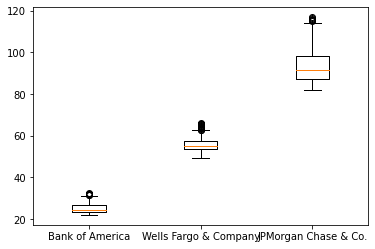

In [29]:
# boxplot:

fig1, ax1 = plt.subplots()

plt.boxplot(bank_price_list,labels=bankStock_list)

In [30]:
# convert 3 df into 3 csv files: 

#pharm_df.to_csv("pharm.csv", index = False)

In [31]:
# manipulating and put into SQL database:

# connect to local database: 
# connection = "postgres:Postgres@localhost:5432/stockPandas_db"
# engine = create_engine(f'postgresql://{connection}')

# put df into sql database format:

#allstock_df.to_sql(name='stock_master', con=engine, if_exists='append', index=False)
# banks_df.to_sql(name='stock_banks', con = engine,if_exists='append',index=False)
# tech_df.to_sql(name='stock_tech', con = engine,if_exists='append',index=False)
# pharm_df.to_sql(name='stock_pharm', con = engine,if_exists='append',index=False)

In [32]:
# Consolidate data to 3 types of bank and 1 month period
BAC30days = banks_df.loc[(banks_df["Name"]=="Bank of America"), :]
BAC1mo=BAC30days.loc[BAC30days["date"] > "2018-01-06"]
BAC1mo.head(22)
# BAC1mo.to_csv("BAC1mo.csv",index=False)

,date,open,high,low,close,volume,Symbol,Name,Industry,Market Cap
16365,2018-01-08,30.23,30.27,30.050,30.12,42914839,BAC,Bank of America,Banks,3.503370e+11
16366,2018-01-09,30.20,30.54,30.130,30.27,69479053,BAC,Bank of America,Banks,3.503370e+11
16367,2018-01-10,30.37,30.73,30.310,30.55,63532811,BAC,Bank of America,Banks,3.503370e+11
16368,2018-01-11,30.66,30.69,30.450,30.66,59318309,BAC,Bank of America,Banks,3.503370e+11
16369,2018-01-12,30.88,31.20,30.770,31.19,66371596,BAC,Bank of America,Banks,3.503370e+11
16370,2018-01-16,31.74,31.79,31.030,31.24,104467922,BAC,Bank of America,Banks,3.503370e+11
16371,2018-01-17,31.00,31.29,30.340,31.18,124382905,BAC,Bank of America,Banks,3.503370e+11
16372,2018-01-18,31.33,31.71,31.210,31.48,76463847,BAC,Bank of America,Banks,3.503370e+11
16373,2018-01-19,31.58,31.74,31.460,31.72,66490985,BAC,Bank of America,Banks,3.503370e+11
16374,2018-01-22,31.67,31.94,31.580,31.94,53848818,BAC,Bank of America,Banks,3.503370e+11


In [33]:
WFG30days = banks_df.loc[(banks_df["Name"]=="Wells Fargo & Company"), :]
WFG1mo=WFG30days.loc[WFG30days["date"] > "2018-01-06"]

# WFG1mo.to_csv("WFG1mo.csv",index=False)

In [34]:
JPM30days = banks_df.loc[(banks_df["Name"]=="JPMorgan Chase & Co."), :]
JPM1mo=JPM30days.loc[JPM30days["date"] > "2018-01-06"]

# JPM1mo.to_csv("JPM1mo.csv",index=False)

In [35]:
# Consolidate data to 3 types of bank and 1 month period
pharm1mo = pharm_df.loc[(pharm_df["Name"]=="Johnson & Johnson") | (pharm_df["Name"]=="Merck & Co.") | (pharm_df["Name"]=="Pfizer"), :]
pharm1mo=pharm1mo.loc[pharm1mo["date"] > "2018-01-06"]

# pharm1mo.to_csv("pharm1mo.csv",index=False)

In [36]:
# Consolidate data to 3 types of bank and 1 month period
APL30days = tech_df.loc[(tech_df["Name"]=="Apple"), :]
APL1mo = APL30days.loc[APL30days["date"] > "2018-01-06"]
APL1mo.to_csv("APL1mo.csv", index=False)

# tech1mo.to_csv("tech1mo.csv",index=False)


In [37]:
SEA30days = tech_df.loc[(tech_df["Name"]=="Seagate Technology Holdings"), :]
SEA1mo = SEA30days.loc[SEA30days["date"] > "2018-01-06"]
#SEA1mo.to_csv("SEA1mo.csv", index=False)

In [38]:
WTD30days = tech_df.loc[(tech_df["Name"]=="Western Digital"), :]
WTD1mo = WTD30days.loc[WTD30days["date"] > "2018-01-06"]
#WTD1mo.to_csv("WTD1mo.csv", index=False)